In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
outputdir = inputdir+'xsec_flux_2D_2_mar18/' 
output_filedir = outputdir
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.18/04


In [2]:
pot_data =    7.644e+18

outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"xsec_flux_other_2D_2.root","RECREATE");


In [3]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [4]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Other Genie 2D cross section error calculation

In [5]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [6]:
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_cv = f_flux_int.Get("hEnumu_cv")

NumberOfFiles = 5000#4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 128.175*2*116.5*2 #236.35 * 213.0
#active_Area = 128.175*2*116.5*2

flux_cv = 7.3789785277e-10
h_flux_cv_file = f_flux_int.Get("hEnumu_cv")
flux_cv_file = h_flux_cv_file.Integral(0,201)/(NumberOfFiles*POT_file*fidVol_Area)
print flux_cv , flux_cv_file, 1-flux_cv_file/flux_cv

7.3789785277e-10 7.37180333687e-10 0.000972382667705


In [7]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [8]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


In [9]:
weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]


f_flux = []
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/xsec_2d_flux/root_output/'
for f in range(len(weight_list)):
    f_flux.append(ROOT.TFile.Open(path+"expskin_FluxUnisim_Flux_systematic.root", 'read'))
    
f_flux_r = []
path_r = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/xsec_2d_flux_rest/root_output/'
for f in range(len(weight_list)):
    f_flux_r.append(ROOT.TFile.Open(path_r+weight_list[f]+"_Flux_systematic_rest.root", 'read'))
    
path_cv = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_filesV4/xsec_2D_wighted.root", 'read')

num_para = len(weight_list)
print 'Nuber of parameters: ',num_para
num_universes = 100
#max_entries = 100000
#num_para = 1


Nuber of parameters:  13


In [10]:
# get data, ext and dirt from CV file
h_data = []
h_ext = []
h_dirt = []
h_overlay_cv = []
h_eff_tilde_cv = []

for t_bin in range(len_theta):
    h_data.append(f_cv.Get('h_data['+str(t_bin)+']'))
    h_ext.append(f_cv.Get('h_ext['+str(t_bin)+']'))
    h_dirt.append(f_cv.Get('h_dirt['+str(t_bin)+']'))
    #h_overlay_cv.append(f_flux_r[0].Get('h_overlay_cv['+str(t_bin)+']'))
    #h_eff_tilde_cv.append(f_flux_r[0].Get('h_1d_eff_tilde_cv['+str(t_bin)+']'))
    h_overlay_cv.append(f_cv.Get('h_overlay['+str(t_bin)+']'))
    h_eff_tilde_cv.append(f_cv.Get('h_1d_eff_tilde['+str(t_bin)+']'))

print h_data[0].Integral(0,len_mom[0]+1)
print h_ext[0].Integral(0,len_mom[0]+1)
print h_dirt[0].Integral(0,len_mom[0]+1)
print h_overlay_cv[0].Integral(0,len_mom[0]+1)

88.0
5.80717624724
11.4282898307
28.7172985971


In [11]:
# get background from all genie file
h_bkg = []

for para in range(num_para):
    h_bkg.append([])
    for uni in range(num_universes):
        h_bkg[para].append([])
        for t_bin in range(len_theta):
            h_bkg[para][uni].append(f_flux_r[para].Get('h_overlay['+str(0)+']['+str(uni)+']['+str(t_bin)+']'))
print h_bkg[0][0][0].Integral(0,len_mom[0]+1)

27.6368351057


In [12]:
path_np = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
smearing_matrix_cv = np.load(path_np+'xsec_2d_flux/smearing_matrix_cv.npy')
num_sel_cv = np.load(path_np+'xsec_2d_flux_rest/root_output/num_sel_cv.npy')
num_gen_cv = np.load(path_np+'xsec_2d_flux_rest/root_output/num_gen_cv.npy')

#smearing_matrix = np.load(path_np+'xsec_2d_flux/smearing_matrix.npy')
#num_sel = np.load(path_np+'xsec_2d_flux_rest/root_output/num_sel.npy')
#num_gen = np.load(path_np+'xsec_2d_flux_rest/root_output/num_gen.npy')

#print smearing_matrix.shape

In [13]:
h_smearing = []
h_sel_all = []
h_gen_all = []

smearing_matrix = np.zeros((num_para,num_universes,sum_bins,sum_bins))
num_sel = np.zeros((num_para,num_universes,sum_bins))
num_gen = np.zeros((num_para,num_universes,sum_bins))

for para in range(num_para):
    h_smearing.append([])
    h_sel_all.append([])
    h_gen_all.append([])
    for uni in range(num_universes):
        h_smearing[para].append(f_flux[para].Get('h_smearing['+str(0)+']['+str(uni)+']'))
        h_sel_all[para].append(f_flux_r[para].Get('h_sel_all['+str(0)+']['+str(uni)+']'))
        h_gen_all[para].append(f_flux_r[para].Get('h_gen_all['+str(0)+']['+str(uni)+']'))
        for i in range(sum_bins):
            for j in range(sum_bins):
                smearing_matrix[para][uni][i][j]=h_smearing[para][uni].GetBinContent(i+1,j+1)
            num_sel[para][uni][i]=h_sel_all[para][uni].GetBinContent(i+1)
            num_gen[para][uni][i]=h_gen_all[para][uni].GetBinContent(i+1)

In [14]:
# calculate cv smeared efficiency tilde
eff_tilde_cv = smearing_matrix_cv.dot(num_sel_cv)/(smearing_matrix_cv.dot(num_gen_cv)+1e-80)
h_1d_eff_tilde_cv = []
for t_bin in range(len_theta):
    h_1d_eff_tilde_cv.append( ROOT.TH1F('h_1d_eff_tilde_cv['+str(t_bin)+']',"reco efficiency (cv)",len_mom[t_bin],array('f',mom_bins[t_bin])) )
bin_counter = 0
for t_bin in range(len_theta):
    for m_bin in range(len_mom[t_bin]):
        h_1d_eff_tilde_cv[t_bin].SetBinContent(m_bin+1,eff_tilde_cv[bin_counter])
        h_1d_eff_tilde_cv[t_bin].SetBinError(m_bin+1,0)
        bin_counter += 1
    #h_1d_eff_tilde_cv[t_bin].Write('h_1d_eff_tilde_cv['+str(t_bin)+']')
#np.save(outputdir+'eff_tilde_cv',eff_tilde_cv)

In [15]:
# calculate smeared efficiency tilde
eff_tilde = []
h_eff_tilde = []
for para in range(num_para):
    eff_tilde.append([])
    h_eff_tilde.append([])
    for uni in range(num_universes):
        eff_tilde[para].append(smearing_matrix[para][uni].dot(num_sel[para][uni]) / (smearing_matrix[para][uni].dot(num_gen[para][uni])+1e-80) )
        h_eff_tilde[para].append([])
        bin_counter = 0
        for t_bin in range(len_theta):
            h_eff_tilde[para][uni].append( ROOT.TH1F('h_eff_tilde['+str(para)+']['+str(uni)+']['+str(t_bin)+']',"reco efficiency",len_mom[t_bin],array('f',mom_bins[t_bin])) )
            for m_bin in range(len_mom[t_bin]):
                #print eff_tilde[uni]
                #print '-------------------------'
                h_eff_tilde[para][uni][t_bin].SetBinContent(m_bin+1,eff_tilde[para][uni][bin_counter])
                h_eff_tilde[para][uni][t_bin].SetBinError(m_bin+1,0)
                bin_counter += 1
            #h_1d_eff_tilde[para][uni][t_bin].Write('h_1d_eff_tilde['+str(para)+']['+str(uni)+']['+str(t_bin)+']')
#np.save(outputdir+'eff_tilde',eff_tilde)

NameError: name 'fdgsdfgsfg' is not defined

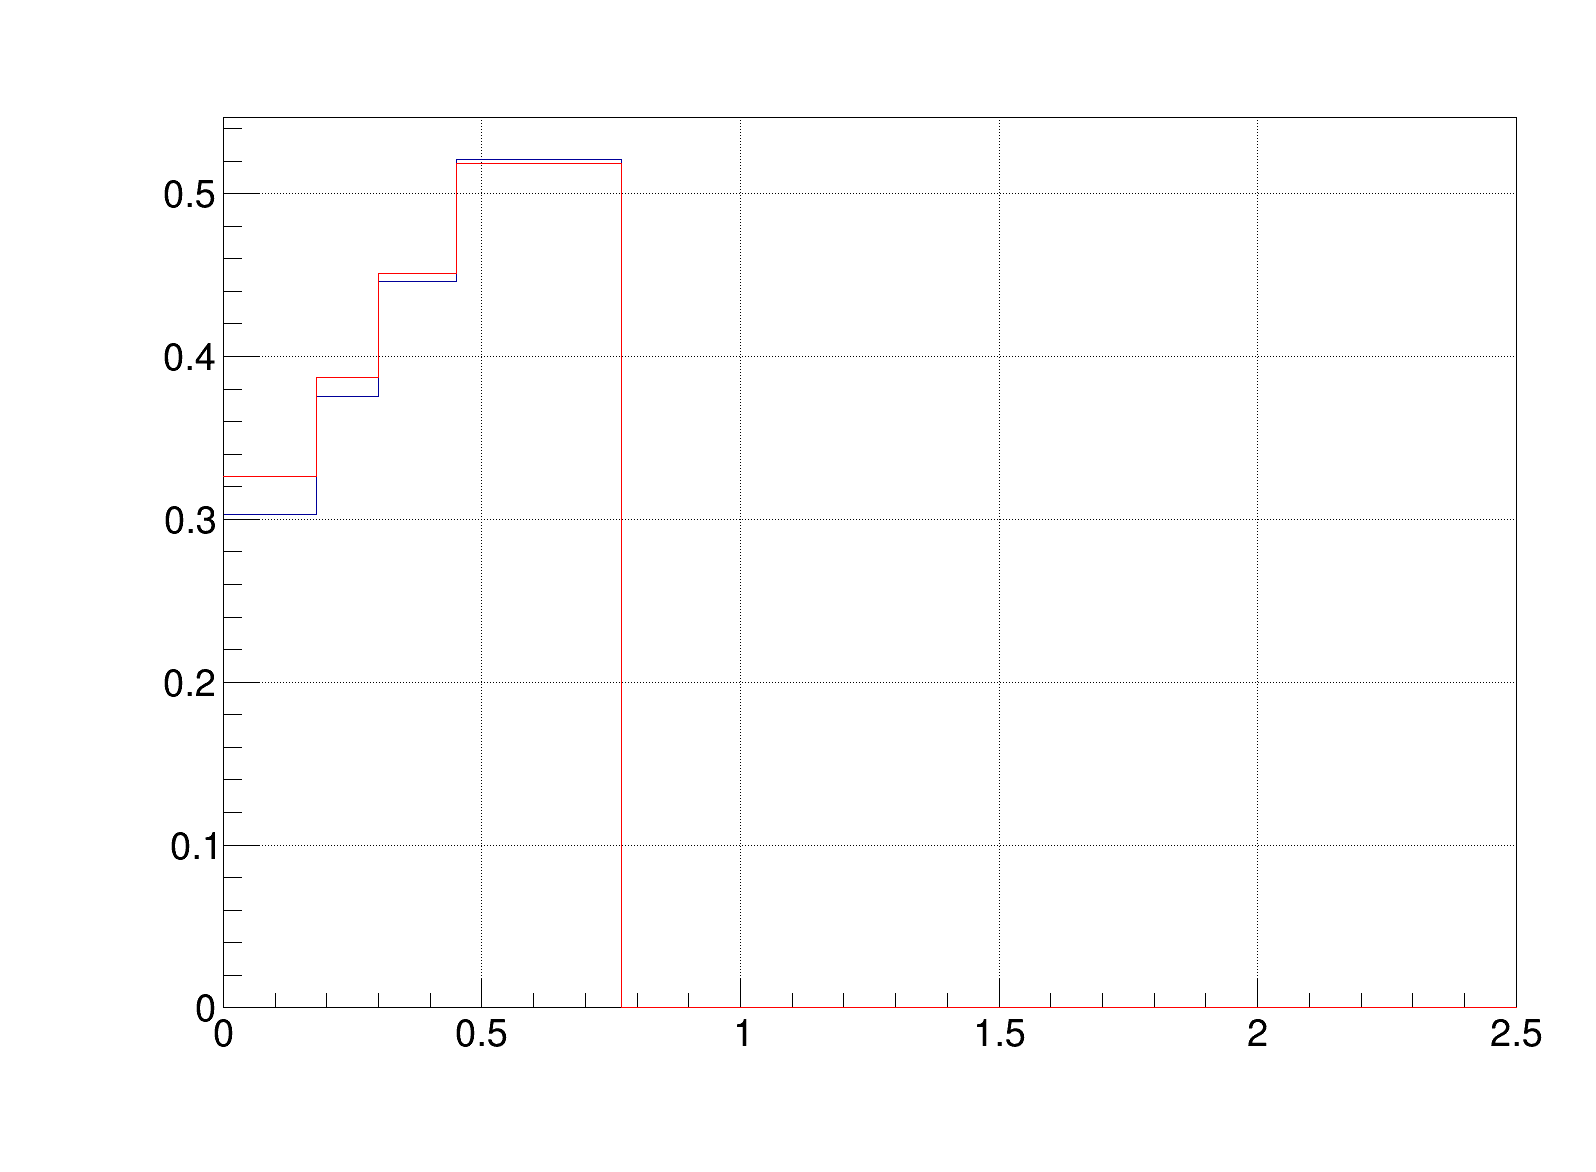

In [16]:
t_bin = 0
h_eff_tilde[para][uni][t_bin].Draw()
h_1d_eff_tilde_cv[t_bin].SetLineColor(2)
h_1d_eff_tilde_cv[t_bin].Draw('same')
c1.Draw()
fdgsdfgsfg

In [17]:
# calculate cv xsec
h_xsec_data_cv = []


for t_bin in range(len_theta):
    h_xsec_data_cv.append(h_data[t_bin].Clone())
    h_xsec_data_cv[t_bin].Add(h_ext[t_bin],-1)
    h_xsec_data_cv[t_bin].Add(h_dirt[t_bin],-1)
    h_xsec_data_cv[t_bin].Add(h_overlay_cv[t_bin],-1)

    h_xsec_data_cv[t_bin].Divide(h_eff_tilde_cv[t_bin])
    h_xsec_data_cv[t_bin].Scale(1.0/(N_tot*beam_flux*1e-38))

    for m_bin in range(len_mom[t_bin]):
        h_xsec_data_cv[t_bin].SetBinContent(m_bin+1,h_xsec_data_cv[t_bin].GetBinContent(m_bin+1)/h_xsec_data_cv[t_bin].GetBinWidth(m_bin+1))
        h_xsec_data_cv[t_bin].SetBinError(m_bin+1,h_xsec_data_cv[t_bin].GetBinError(m_bin+1)/h_xsec_data_cv[t_bin].GetBinWidth(m_bin+1))

    bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
    h_xsec_data_cv[t_bin].Scale(1.0/bin_width_theta)

In [18]:
#h_flux_cv = f_flux.Get('numu/numu_CV_AV_TPC')
h_flux_cv = f_flux_int.Get("hEnumu_cv") # zarko
beam_flux = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*fidVol_Area)*pot_data
print beam_flux,NumberOfFiles,POT_file,fidVol_Area,pot_data
active_Area = 128.175*2*116.5*2
beam_zarko = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*fidVol_Area)
print 'used flux:',7.3789785277e-10 ,'flux zarko: ',beam_zarko,'difference: ',(1-beam_zarko/7.3789785277e-10)*100,'%'

5635006470.71 5000 500000000.0 59729.55 7.644e+18
used flux: 7.3789785277e-10 flux zarko:  7.37180333687e-10 difference:  0.0972382667705 %


In [19]:
# calculate xsec for each universe
h_xsec_data = []

for para in range(num_para):
    h_xsec_data.append([])
    for uni in range(num_universes):
        h_xsec_data[para].append([])
        for t_bin in range(len_theta):
            h_xsec_data[para][uni].append(h_data[t_bin].Clone())
            h_xsec_data[para][uni][t_bin].Add(h_ext[t_bin],-1)
            h_xsec_data[para][uni][t_bin].Add(h_dirt[t_bin],-1)
            h_xsec_data[para][uni][t_bin].Add(h_bkg[para][uni][t_bin],-1)

            h_xsec_data[para][uni][t_bin].Divide(h_eff_tilde[para][uni][t_bin])
            
            h_flux_var = f_flux_int.Get('numu_ms_'+weight_list[para]\
                                +'/hEnumu_'+weight_list[para]\
                                +'_ms_'+str(uni))
            flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*active_Area)*pot_data
            #flux_var = flux_var/(NumberOfFiles*POT_file*active_Area)*pot_data
        
            h_xsec_data[para][uni][t_bin].Scale(1.0/(N_tot*flux_var*1e-38))

            for m_bin in range(len_mom[t_bin]):
                h_xsec_data[para][uni][t_bin].SetBinContent(m_bin+1,h_xsec_data[para][uni][t_bin].GetBinContent(m_bin+1)/h_xsec_data[para][uni][t_bin].GetBinWidth(m_bin+1))
                h_xsec_data[para][uni][t_bin].SetBinError(m_bin+1,h_xsec_data[para][uni][t_bin].GetBinError(m_bin+1)/h_xsec_data[para][uni][t_bin].GetBinWidth(m_bin+1))

            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_xsec_data[para][uni][t_bin].Scale(1.0/bin_width_theta)

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_0_all.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_0_all.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_1_all.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_1_all.pdf has been created
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_2_all.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_2_all.pdf has been created
Info in <TCanvas

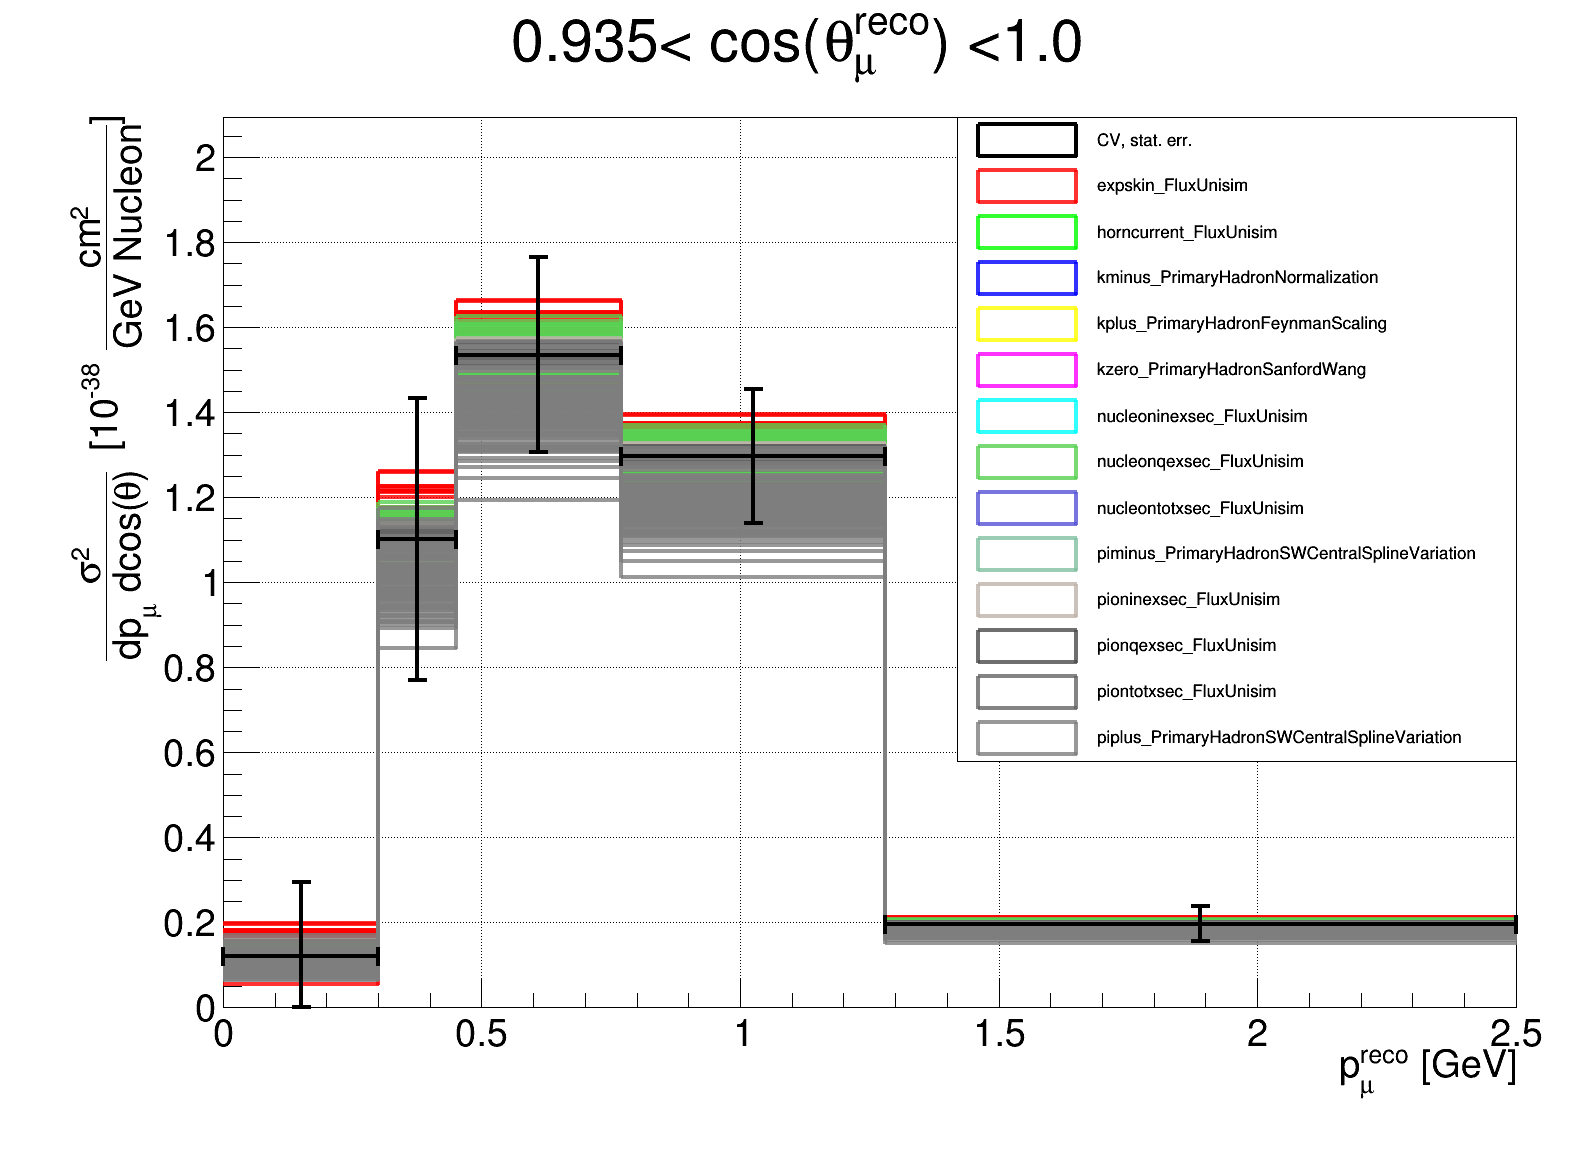

In [20]:
# draw all xsec

ROOT.gStyle.SetOptTitle(1)
ROOT.gStyle.SetEndErrorSize(9)
for t_bin in range(len_theta): #len_theta
    legend = ROOT.TLegend(0.6,0.35,0.95,0.9); #LEGEND RIGHT
    h_xsec_data_cv[t_bin].SetLineColorAlpha(1,1)
    h_xsec_data_cv[t_bin].SetLineWidth(4)
    h_xsec_data_cv[t_bin].SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
    h_xsec_data_cv[t_bin].SetXTitle("p^{reco}_{#mu} [GeV]")
    h_xsec_data_cv[t_bin].SetYTitle('#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]')
    h_xsec_data_cv[t_bin].SetMaximum(-1111)
    h_xsec_data_cv[t_bin].SetMinimum(0)
    h_xsec_data_cv[t_bin].SetMaximum( h_xsec_data[para][uni][t_bin].GetMaximum()*1.5)
    h_xsec_data_cv[t_bin].Draw('hist')
    legend.AddEntry(h_xsec_data_cv[t_bin],'CV, stat. err.',"f")
    for para in range(num_para):
        for uni in range(num_universes):
            h_xsec_data[para][uni][t_bin].SetLineColorAlpha(2,0.8)
            h_xsec_data[para][uni][t_bin].GetYaxis().SetTitleSize(0.05)
            h_xsec_data[para][uni][t_bin].GetYaxis().SetTitleOffset(0.0)
            h_xsec_data[para][uni][t_bin].GetYaxis().SetLabelSize(0.05)
            h_xsec_data[para][uni][t_bin].GetXaxis().SetTitleSize(0.05)
            h_xsec_data[para][uni][t_bin].GetXaxis().SetLabelSize(0.05)
            h_xsec_data[para][uni][t_bin].GetXaxis().SetTitleOffset(1)
            h_xsec_data[para][uni][t_bin].SetLineColorAlpha(para+2,0.8)
            if para+2==10:
                h_xsec_data[para][uni][t_bin].SetLineColorAlpha(30,0.8)
            h_xsec_data[para][uni][t_bin].SetLineWidth(4)
            h_xsec_data[para][uni][t_bin].Draw('hist same')
        legend.AddEntry(h_xsec_data[para][uni][t_bin],weight_list[para],"f")
    h_xsec_data_cv[t_bin].Draw('same E1')
    legend.Draw()
    c1.SaveAs(outputdir_png + 'h_xsec_2D_'+str(t_bin)+'_all.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(t_bin)+'_all.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_2D_'+str(t_bin)+'_all.pdf')

    c1.Draw()
            


0.729185432196
0.94140458107
0.937410593033
0.885522812605
1.64658987522
2.05038142204
2.74909061193
3.10801899433
2.3027291894


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_0_all.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_0_all.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: h_col2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_1_all.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_1_all.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: h_col2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_2_all.png has been created
Info in <TCa

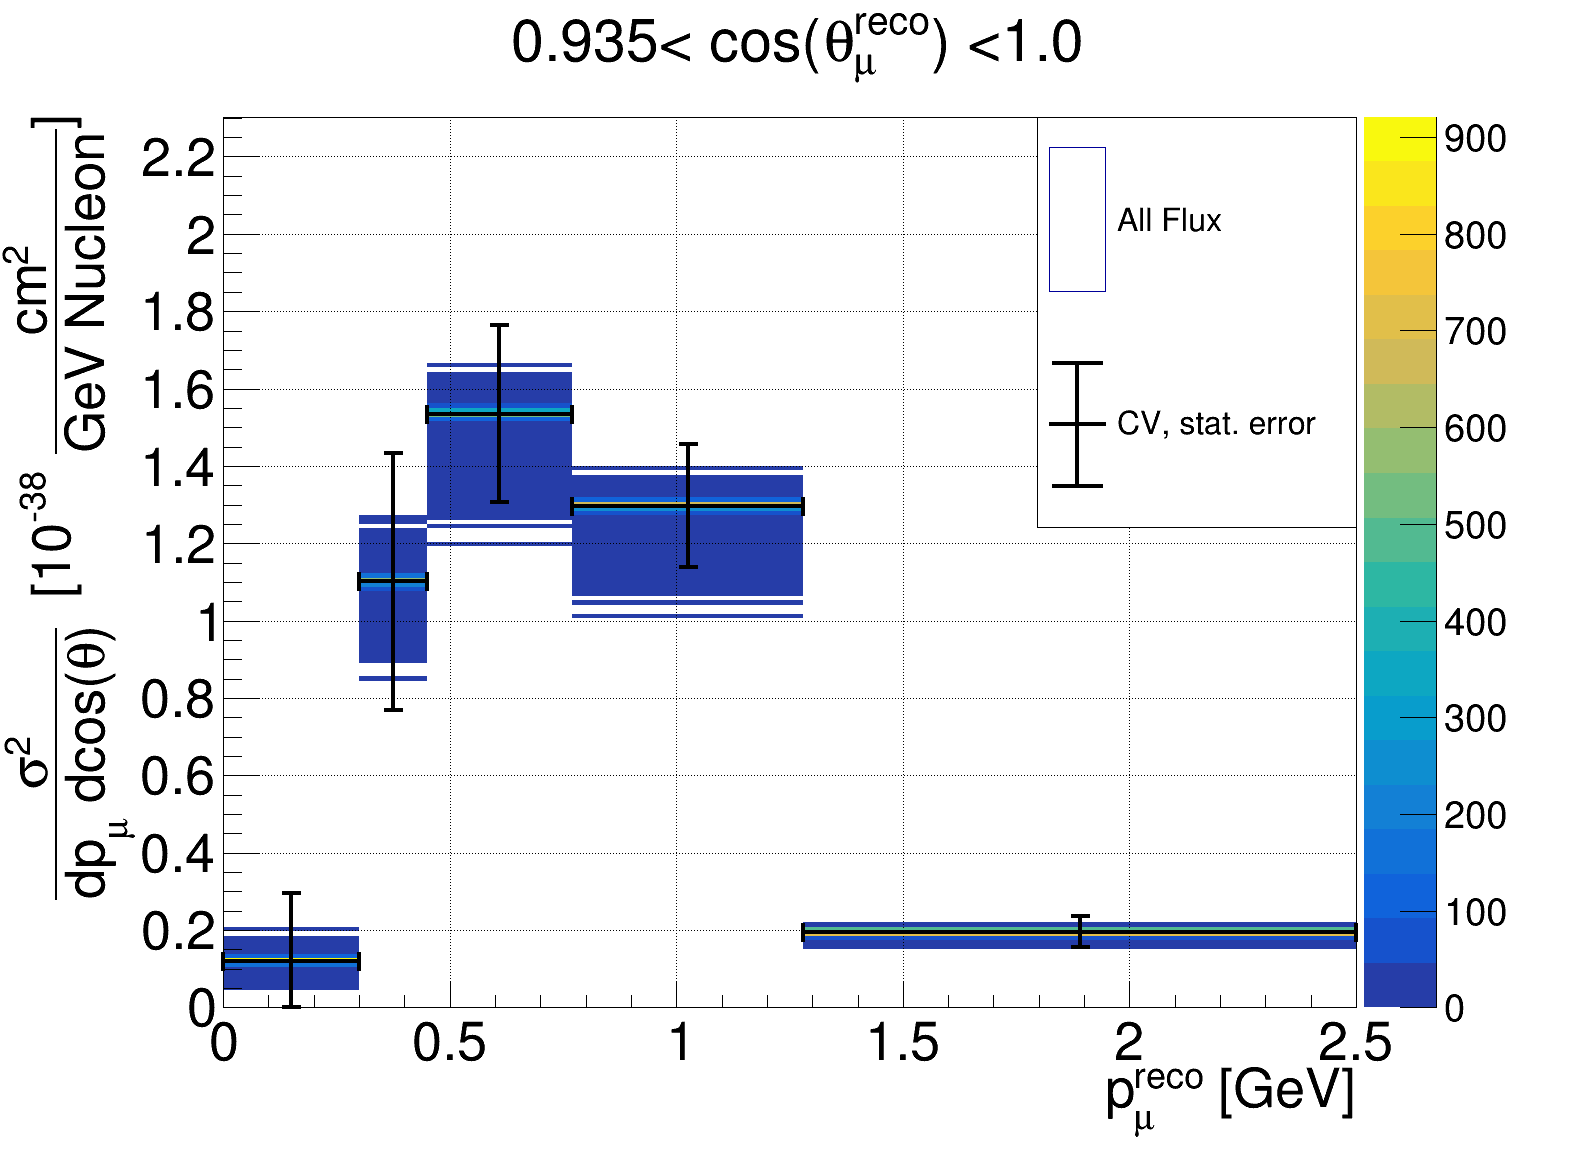

In [21]:
# draw all xsec


c1.SetRightMargin(0.15)
ROOT.gStyle.SetOptTitle(1)
for t_bin in range(len_theta): #len_theta
    #h_xsec_data[uni][t_bin].SetMaximum(-1111)
    h_xsec_data_cv[t_bin].SetMaximum(-1111)
    #h_xsec_data_cv[t_bin].SetMaximum(0)
    ybin = 200
    ystart = 0.0
    yend = h_xsec_data_cv[t_bin].GetMaximum()*1.5
    print yend
    y = np.arange(ystart, yend+(yend-ystart)/(ybin-1), (yend-ystart)/(ybin-1) ).tolist()
    h_col2 = ROOT.TH2D('h_col2','h_col2',len_mom[t_bin],array('f',mom_bins[t_bin]),ybin-1,array('f',y))
    h_col2.SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
    h_col2.SetYTitle("#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]")
    h_col2.SetXTitle("p^{reco}_{#mu} [GeV]")
    h_col2.GetYaxis().SetTitleSize(0.05)
    h_col2.GetYaxis().SetTitleOffset(0.0)
    h_col2.GetYaxis().SetLabelSize(0.05)
    h_col2.GetXaxis().SetTitleSize(0.05)
    h_col2.GetXaxis().SetLabelSize(0.05)
    h_col2.GetXaxis().SetTitleOffset(1)
    legend = ROOT.TLegend(0.65,0.55,0.85,0.9); #LEGEND RIGHT
    for para in range(num_para):
        for uni in range(num_universes):
            for i in range(1,len_mom[t_bin]+1):
                h_col2.Fill(h_xsec_data[para][uni][t_bin].GetXaxis().GetBinCenter(i),h_xsec_data[para][uni][t_bin].GetBinContent(i))
    h_col2.Draw('colz')
    h_xsec_data_cv[t_bin].SetLineWidth(4)
    h_xsec_data_cv[t_bin].SetLineColor(ROOT.kBlack)
    h_xsec_data_cv[t_bin].Draw('E1 same')
    legend.AddEntry(h_col2,'All Flux',"f")
    legend.AddEntry(h_xsec_data_cv[t_bin],'CV, stat. error',"lep")
    legend.Draw()
    c1.SaveAs(outputdir_png + 'h_xsec_2D_'+str(t_bin)+'_all.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(t_bin)+'_all.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_2D_'+str(t_bin)+'_all.pdf')

    c1.Draw()
            


In [22]:
def plot_other_sys_histo(name):
    c1.SetRightMargin(0.05)
    c1.SetLeftMargin(0.18)

    ROOT.gStyle.SetOptTitle(1)
    #files = [f_cv,f_sce,f_lydown,f_wireanglexz,f_wireangleyz,f_wiremodx,f_wiremodyz,f_lyatt,f_lyray,f_recomb2]
    #name_files = [ 'CV','SCE','LYDown', 'WireAngleXZ', 'WireAngleYZ', 'WireModX', 'WireModYZ','LYAttenuation', 'LYRayleigh', 'recomb2' ]
    #name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
    i = 0
    legend = ROOT.TLegend(0.18,0.55,0.45,0.9); #LEGEND RIGHT
    h_files = []
    for para in range(num_para):
        h_files.append([])
        for uni in range(num_universes): 
            h_files[para].append(f_flux[para].Get(name+'['+str(0)+']['+str(uni)+']'))
            h_files[para][uni].SetLineColor(para+1)
            h_files[para][uni].SetLineWidth(4)
            h_files[para][uni].GetYaxis().SetTitleSize(0.05)
            h_files[para][uni].GetYaxis().SetTitleOffset(0.0)
            h_files[para][uni].GetYaxis().SetLabelSize(0.05)
            h_files[para][uni].GetXaxis().SetTitleSize(0.05)
            h_files[para][uni].GetXaxis().SetLabelSize(0.05)
            h_files[para][uni].GetXaxis().SetTitleOffset(1)
            if (para+1)==10:
                h_files[para][uni].SetLineColor(30)
            if (para == 0 and uni==0):
                h_files[para][uni].SetMaximum(-1111)
                h_files[para][uni].SetMaximum(h_files[para][uni].GetMaximum()*1.5)
                h_files[para][uni].SetTitle(name)
                h_files[para][uni].SetXTitle("Bin number")
                h_files[para][uni].SetYTitle("Number of entries")
                h_files[para][uni].Draw('hist')
                legend.Draw()
            else:
                h_files[para][uni].Draw("hist same")
        legend.AddEntry(h_files[para][uni],weight_list[para],"f")
    h_files[0][0].Draw("hist same")
    h_files[0][0].Draw("text same")
    legend.Draw()

    c1.Draw()
    del h_files[:]

    c1.SaveAs(outputdir_png +name+'.png')
    c1.SaveAs(outputdir_root +name+'.root')
    c1.SaveAs(outputdir_pdf +name+'.pdf')
    ROOT.gStyle.SetOptTitle(0)
    return

#h_files.clear()

In [23]:

#variable_list = ['h_sel_all','h_gen_all','h_eff_all']
#for x in variable_list:
#    print 'ploting: ', x
#    plot_other_sys_histo(x)
#c1.SetLeftMargin(0.15)

In [24]:
xsec_cv_vec = np.zeros((sum_bins))
xsec_vec = np.zeros((num_para,num_universes,sum_bins))
xsec_diff_vec = np.zeros((num_para,num_universes,sum_bins))

# fill cv vector xsec_cv_vec
bin_counter=0
for t_bin in range(len_theta): #len_theta
    for m_bin in range(len_mom[t_bin]):
        xsec_cv_vec[bin_counter] = h_xsec_data_cv[t_bin].GetBinContent(m_bin+1)
        bin_counter+=1
#print xsec_cv_vec

xsec_diff = np.zeros((num_para,sum_bins))

# calculate all the differences
for para in range(num_para):
    for uni in range(num_universes):
        bin_counter=0
        for t_bin in range(len_theta): #len_theta
            for m_bin in range(len_mom[t_bin]):
                xsec_vec[para][uni][bin_counter] = h_xsec_data[para][uni][t_bin].GetBinContent(m_bin+1)
                xsec_diff_vec[para][uni][bin_counter] = xsec_vec[para][uni][bin_counter] - xsec_cv_vec[bin_counter]
                bin_counter+=1
    xsec_diff[para] = xsec_diff_vec[para].mean(axis=0)
    #print xsec_diff_vec[para].mean(axis=0)

In [25]:
cov_matrix = np.zeros((sum_bins,sum_bins))
cov_matrix_flux = np.zeros((num_para,sum_bins,sum_bins))

for para in range(num_para):
    for i in range(sum_bins):
        for j in range(sum_bins):
            for uni in range(num_universes):
                cov_matrix_flux[para][i][j] = cov_matrix_flux[para][i][j]+xsec_diff_vec[para][uni][i]*xsec_diff_vec[para][uni][j]
            cov_matrix_flux[para][i][j] = cov_matrix_flux[para][i][j]/num_universes
    cov_matrix = cov_matrix+cov_matrix_flux[para]

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_covariance_fluxsysexpskin_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_covariance_fluxsysexpskin_FluxUnisim.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_covariance_fluxsysexpskin_FluxUnisim.pdf has been created
Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_covariance_fluxsyshorncurrent_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_covariance_fluxsyshorn

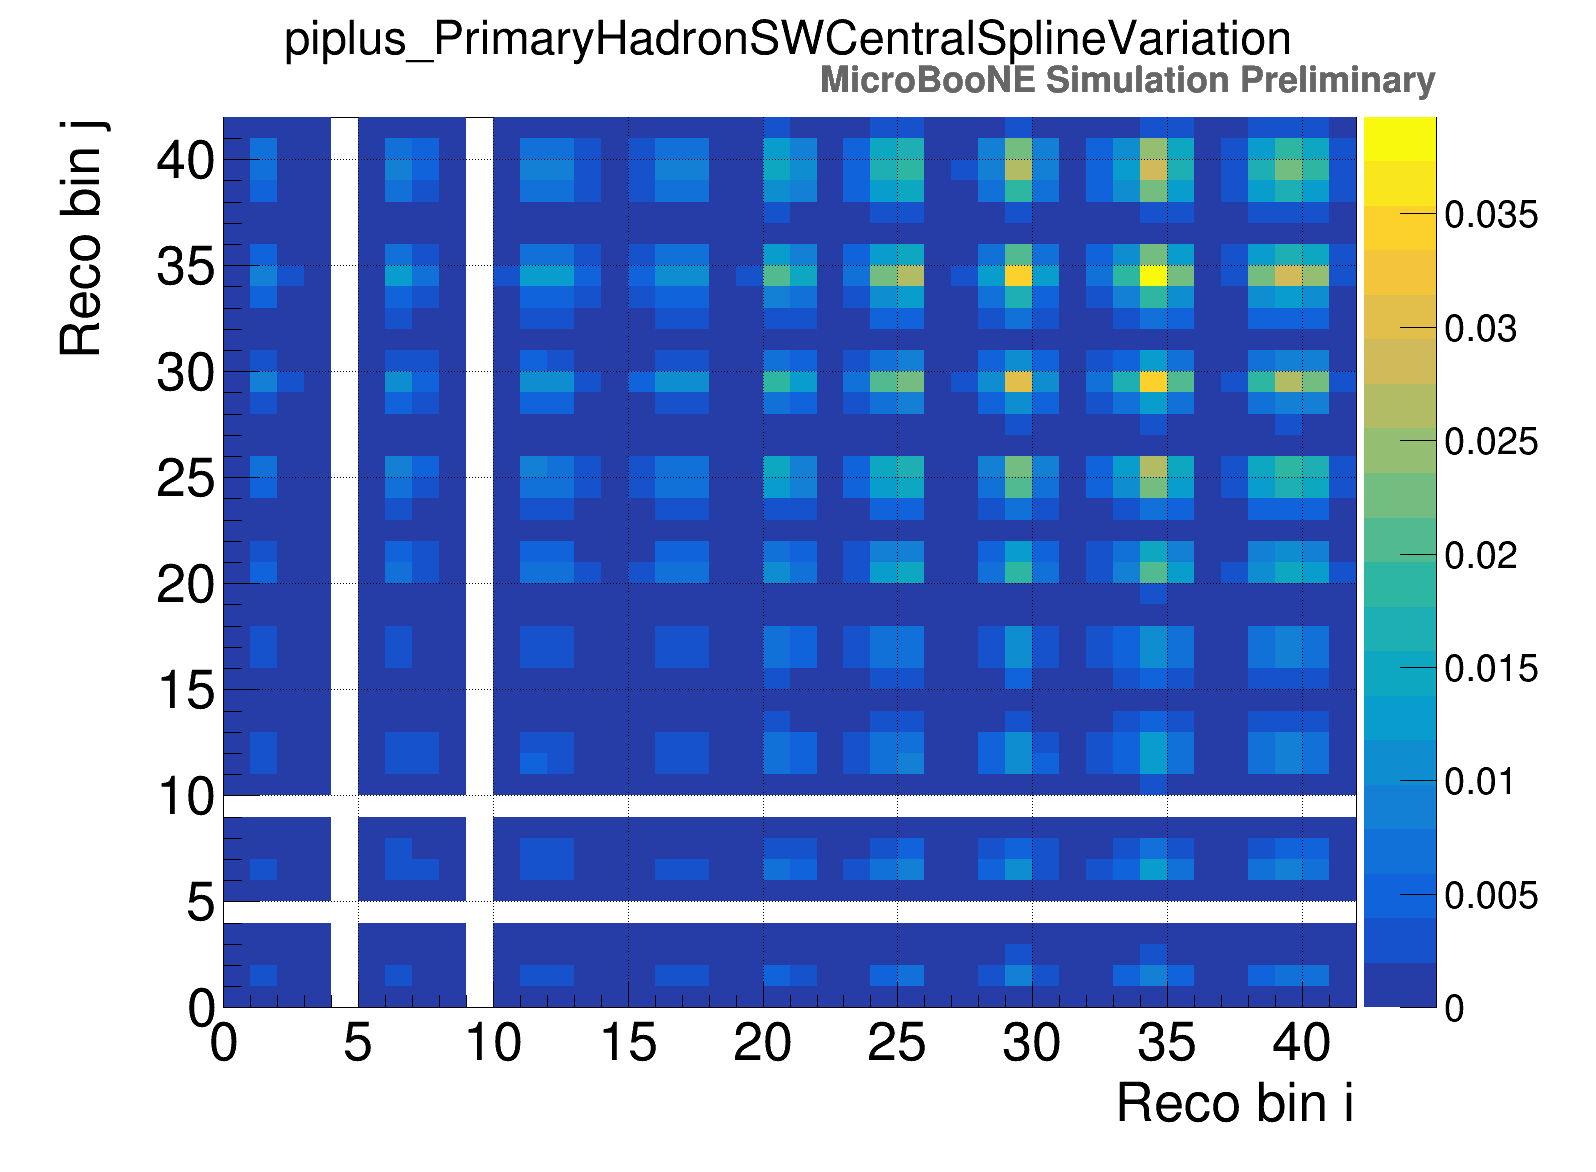

In [26]:
ROOT.gStyle.SetOptTitle(1)

for para in range(num_para):
    ROOT.gStyle.SetPaintTextFormat('0.6g')
    h_covariance = ROOT.TH2D("h_covariance",weight_list[para],sum_bins,0,sum_bins,sum_bins,0,sum_bins)
    for i in range(sum_bins):
        for j in range(sum_bins):
            h_covariance.SetBinContent(i+1,j+1,cov_matrix_flux[para,i,j])
    #h_covariance.SetXTitle("Reco bin i, 7=overflow")
    #h_covariance.SetYTitle("True bin j")
    h_covariance.SetXTitle("Reco bin i")
    h_covariance.SetYTitle("Reco bin j")

    h_covariance.GetYaxis().SetTitleSize(0.05)
    h_covariance.GetYaxis().SetTitleOffset(0.0)
    h_covariance.GetYaxis().SetLabelSize(0.05)
    h_covariance.GetXaxis().SetTitleSize(0.05)
    h_covariance.GetXaxis().SetLabelSize(0.05)
    h_covariance.GetXaxis().SetTitleOffset(1)
    h_covariance.SetLineColor(ROOT.kBlack)
    h_covariance.SetLineWidth(4)
    ROOT.gStyle.SetEndErrorSize(5)
    c1.SetRightMargin(0.15)
    ROOT.gStyle.SetPaintTextFormat('0.4g')

    h_covariance.Draw('colz')
    #_covariance.Draw('same text')
    prelim = draw_sim()
    prelim.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_covariance_fluxsys'+weight_list[para]+'.png')
    c1.SaveAs(outputdir_root + 'h_covariance_fluxsys'+weight_list[para]+'.root')
    c1.SaveAs(outputdir_pdf + 'h_covariance_fluxsys'+weight_list[para]+'.pdf')
    #h_covariance.Write('h_covariance')
        

Warning in <TFile::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_covariance_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_covariance_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_covariance_fluxsys.pdf has been created


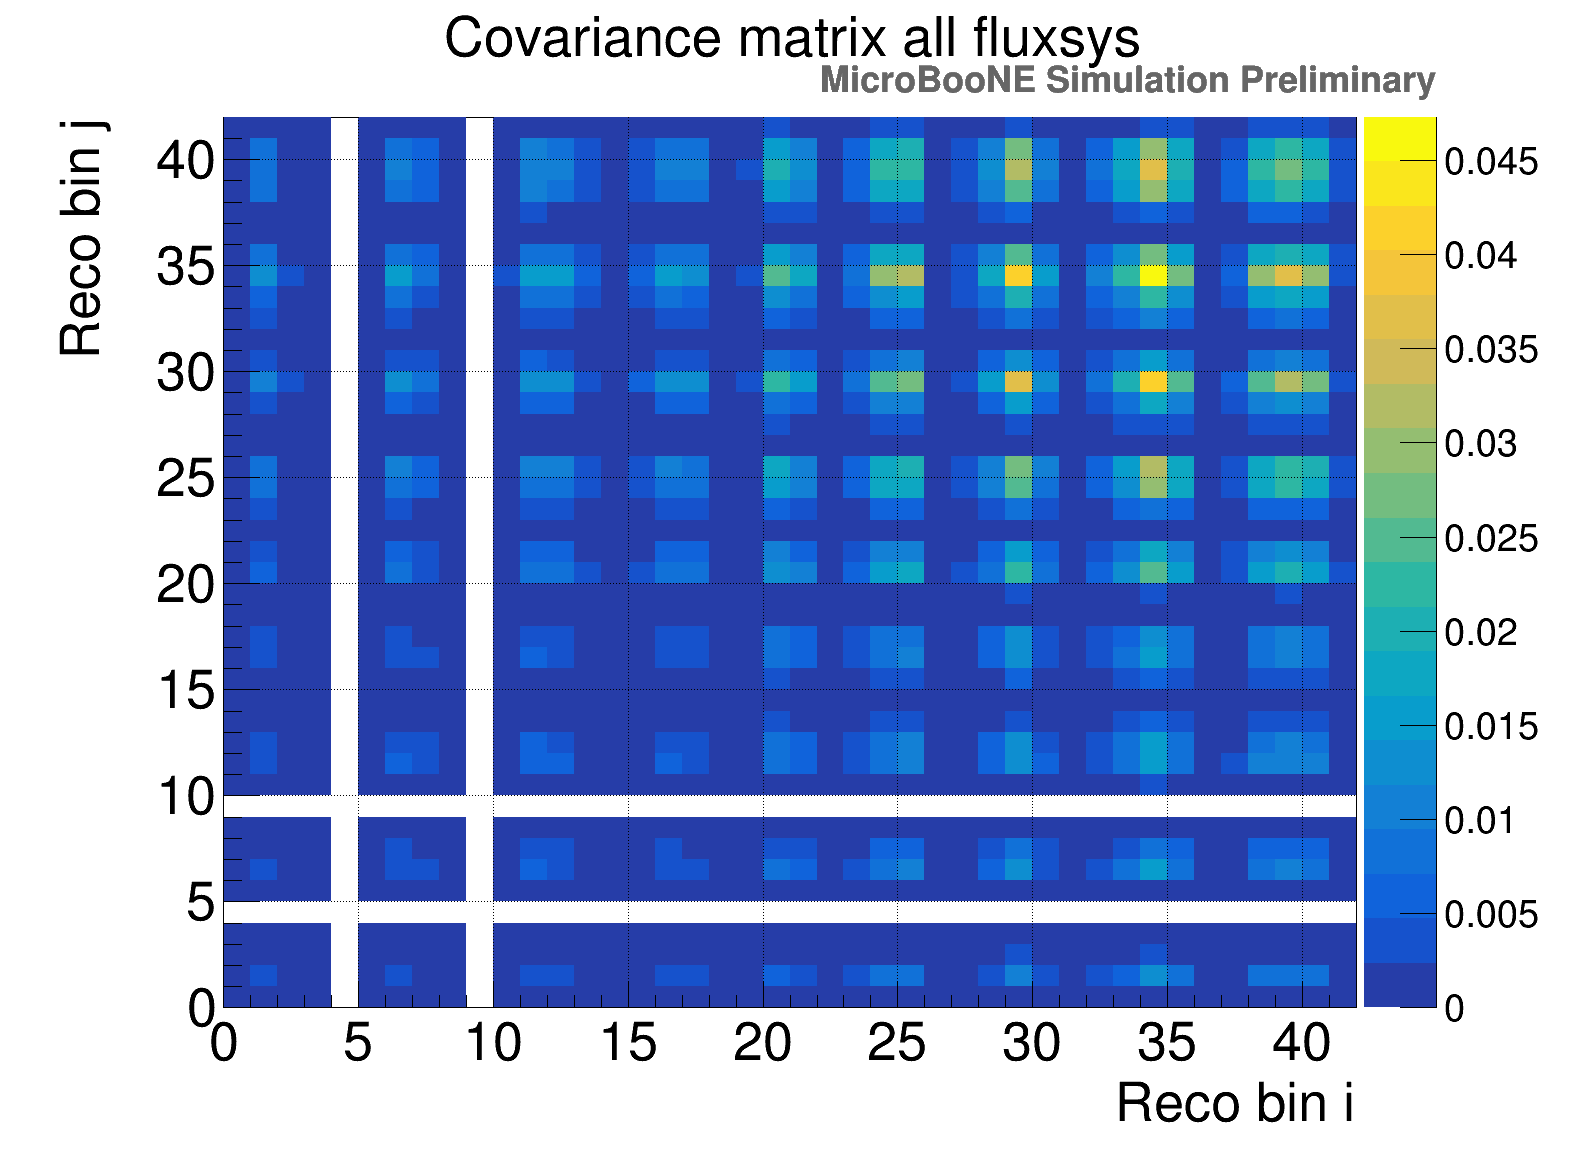

In [27]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix all fluxsys',sum_bins,0,sum_bins,sum_bins,0,sum_bins)
for i in range(sum_bins):
    for j in range(sum_bins):
        h_covariance.SetBinContent(i+1,j+1,cov_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.15)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
#h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_fluxsys.png")
c1.SaveAs(outputdir_root + "h_covariance_fluxsys.root")
c1.SaveAs(outputdir_pdf + "h_covariance_fluxsys.pdf")
#h_covariance.Write('h_covariance')
RootFile = ROOT.TFile(output_filedir+"Flux_systematic_2D.root","update");
h_covariance.Write('h_covariance')
RootFile.Close()  

In [28]:
#correlation matrix
xsec_corr_matrix = np.zeros((sum_bins,sum_bins))
for i in range(sum_bins):
    for j in range(sum_bins):
        xsec_corr_matrix[i][j] = cov_matrix[i][j]/(1e-80+math.sqrt(cov_matrix[i][i]*cov_matrix[j][j]))

#correlation matrix per detsys  
xsec_corr_matrix_flux = np.zeros((num_para,sum_bins,sum_bins))
for para in range(num_para):
    for i in range(sum_bins):
        for j in range(sum_bins):
            xsec_corr_matrix_flux[para][i][j] = cov_matrix_flux[para][i][j]/(1e-80+math.sqrt(cov_matrix_flux[para][i][i]*cov_matrix_flux[para][j][j]))


In [29]:
#frac covariance matrix
xsec_frac_matrix = np.zeros((sum_bins,sum_bins))
for i in range(sum_bins):
    for j in range(sum_bins):
        #print cov_matrix[i][j]
        xsec_frac_matrix[i][j] = cov_matrix[i][j]/(1e-80+(xsec_cv_vec[i]*xsec_cv_vec[j]))

#correlation matrix per detsys  
xsec_frac_matrix_flux = np.zeros((num_para,sum_bins,sum_bins))
for para in range(num_para):
    for i in range(sum_bins):
        for j in range(sum_bins):
            xsec_frac_matrix_flux[para][i][j] = cov_matrix_flux[para][i][j]/(1e-80+(xsec_cv_vec[i]*xsec_cv_vec[j]))


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_correlation_fluxsysexpskin_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_correlation_fluxsysexpskin_FluxUnisim.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_correlation_fluxsysexpskin_FluxUnisim.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_correlation_fluxsyshorncurrent_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_correlation_fluxsy

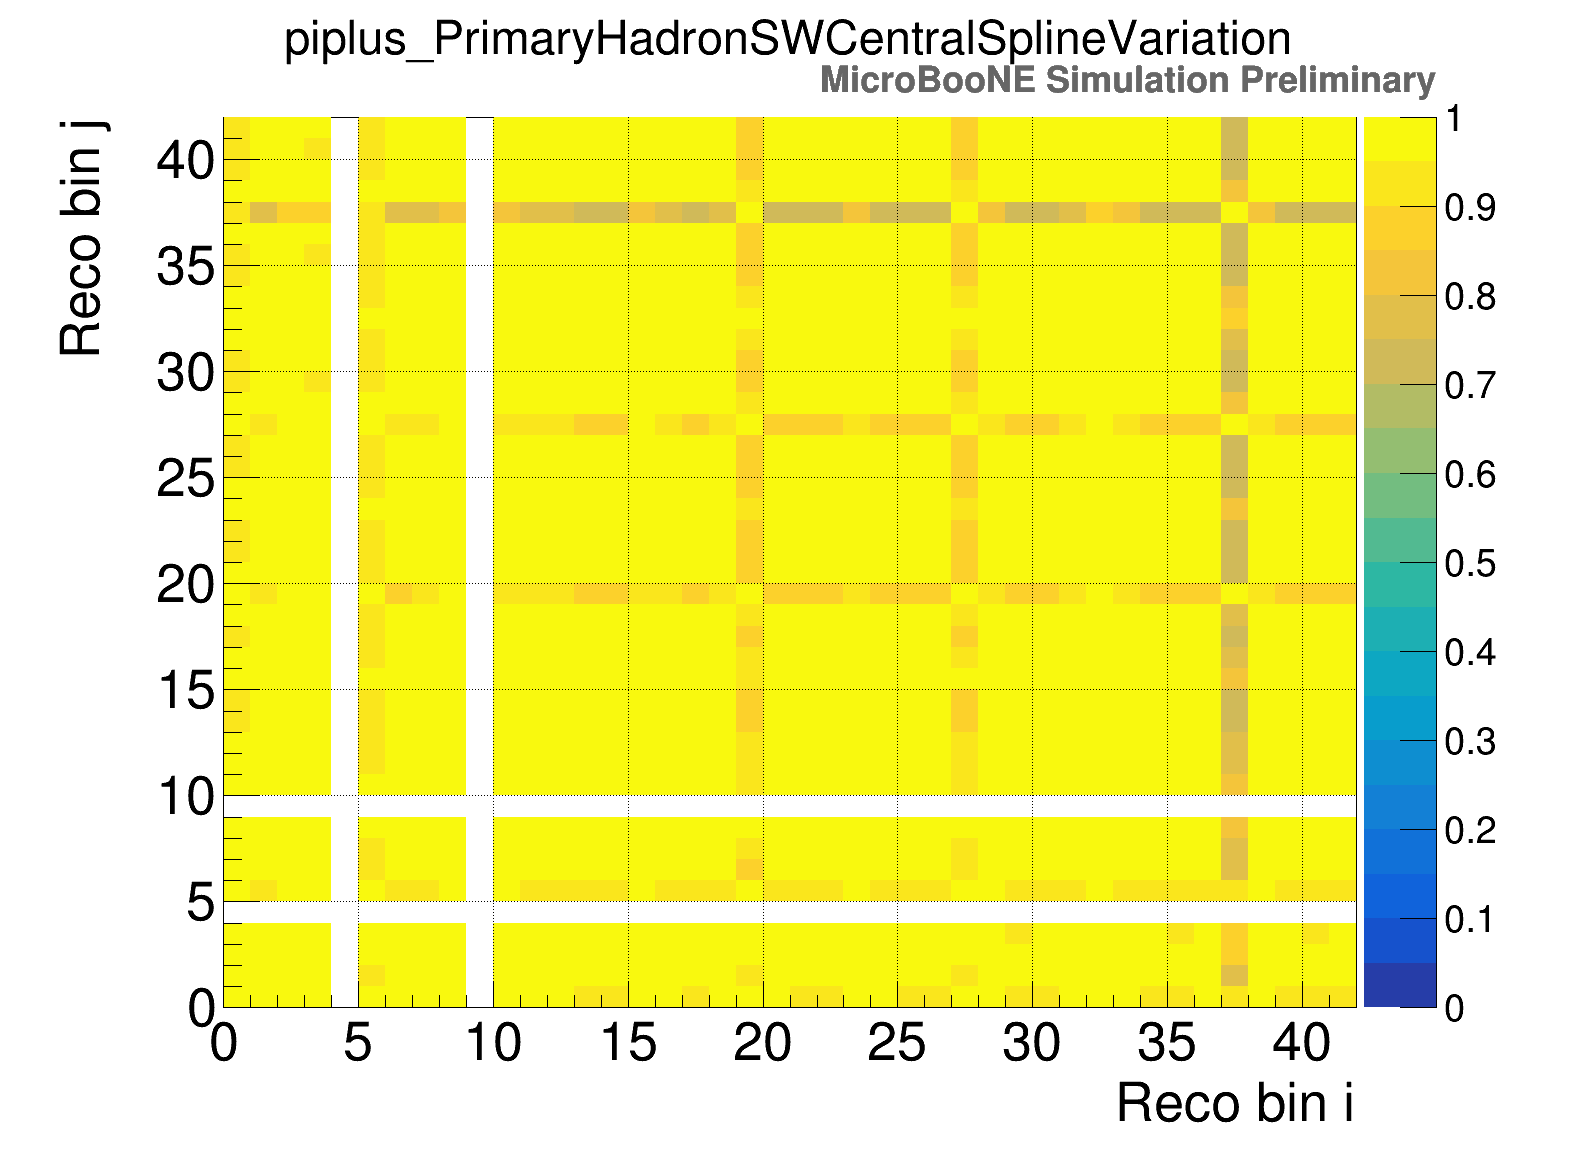

In [30]:
ROOT.gStyle.SetOptTitle(1)

for para in range(num_para):
    ROOT.gStyle.SetPaintTextFormat('0.6g')
    h_covariance = ROOT.TH2D("h_covariance",weight_list[para],sum_bins,0,sum_bins,sum_bins,0,sum_bins)
    for i in range(sum_bins):
        for j in range(sum_bins):
            h_covariance.SetBinContent(i+1,j+1,xsec_corr_matrix_flux[para][i,j])
    #h_covariance.SetXTitle("Reco bin i, 7=overflow")
    #h_covariance.SetYTitle("True bin j")
    h_covariance.SetXTitle("Reco bin i")
    h_covariance.SetYTitle("Reco bin j")

    h_covariance.GetYaxis().SetTitleSize(0.05)
    h_covariance.GetYaxis().SetTitleOffset(0.0)
    h_covariance.GetYaxis().SetLabelSize(0.05)
    h_covariance.GetXaxis().SetTitleSize(0.05)
    h_covariance.GetXaxis().SetLabelSize(0.05)
    h_covariance.GetXaxis().SetTitleOffset(1)
    h_covariance.SetLineColor(ROOT.kBlack)
    h_covariance.SetLineWidth(4)
    ROOT.gStyle.SetEndErrorSize(5)
    c1.SetRightMargin(0.15)
    ROOT.gStyle.SetPaintTextFormat('0.4g')

    h_covariance.Draw('colz')
    #_covariance.Draw('same text')
    prelim = draw_sim()
    prelim.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_correlation_fluxsys'+weight_list[para]+'.png')
    c1.SaveAs(outputdir_root + 'h_correlation_fluxsys'+weight_list[para]+'.root')
    c1.SaveAs(outputdir_pdf + 'h_correlation_fluxsys'+weight_list[para]+'.pdf')
    #h_covariance.Write('h_covariance')

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_correlation_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_correlation_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_correlation_fluxsys.pdf has been created


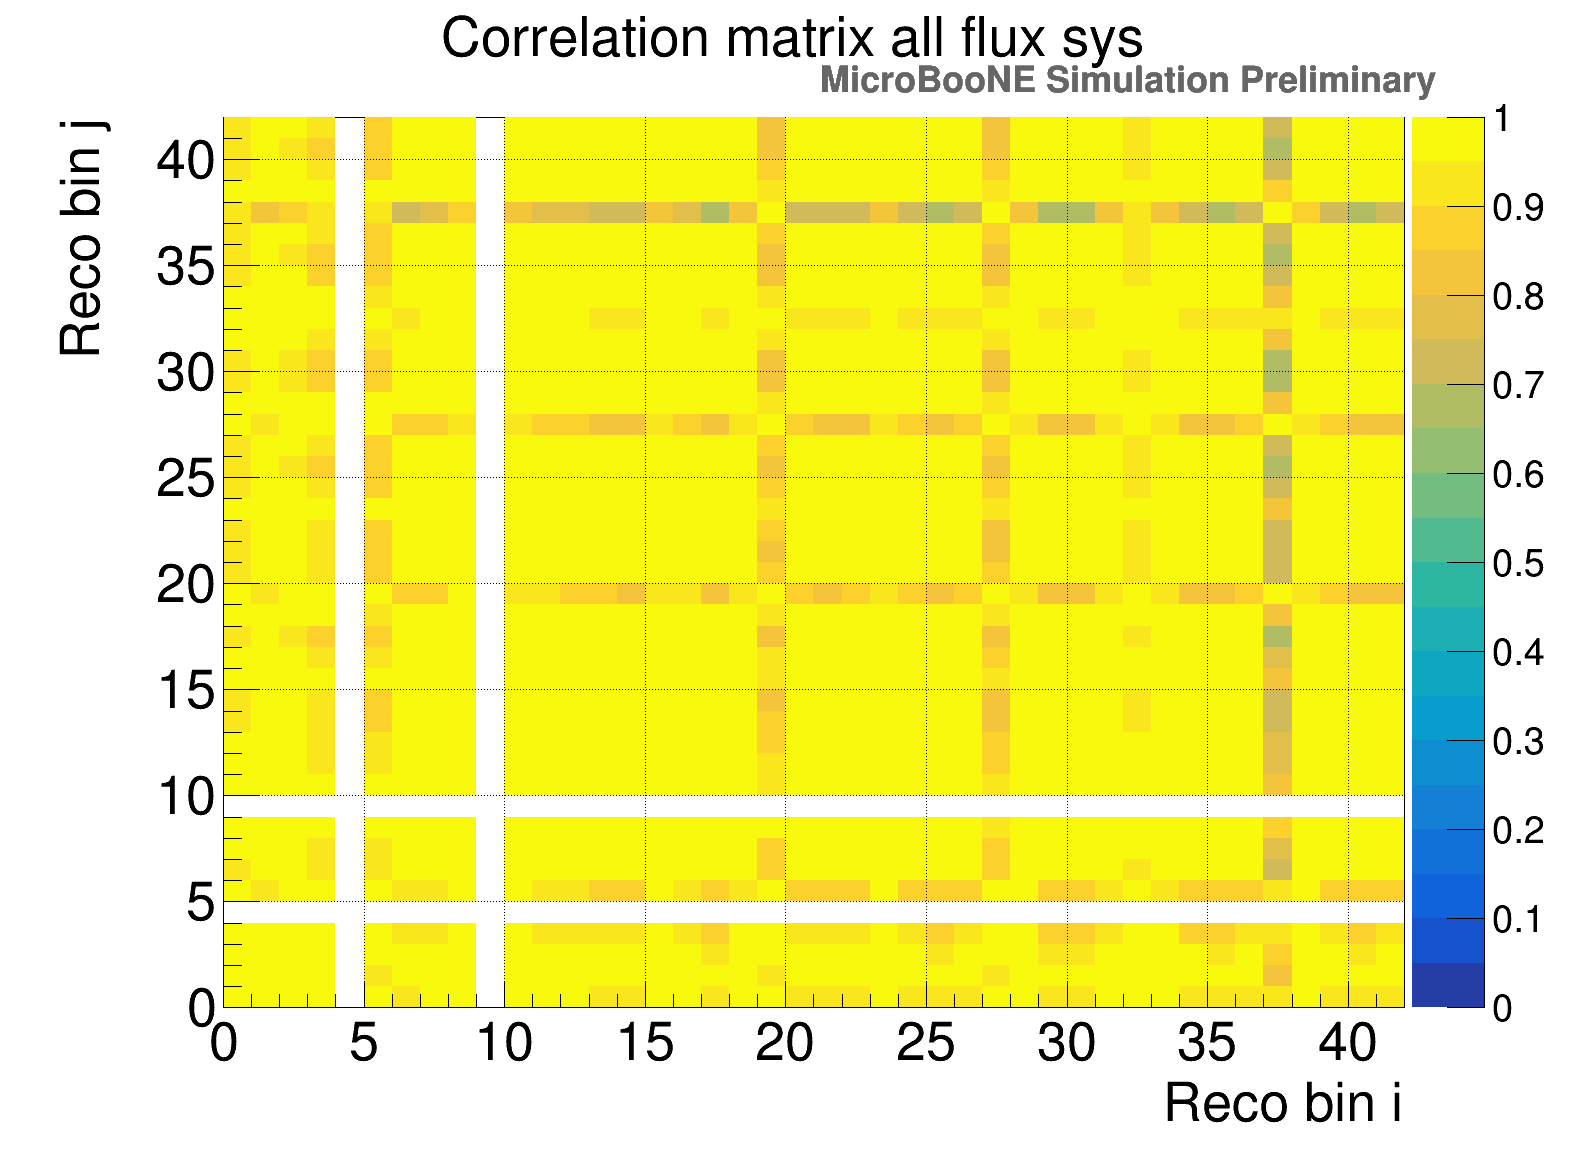

In [31]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'Correlation matrix all flux sys',sum_bins,0,sum_bins,sum_bins,0,sum_bins)
for i in range(sum_bins):
    for j in range(sum_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
#h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_fluxsys.png")
c1.SaveAs(outputdir_root + "h_correlation_fluxsys.root")
c1.SaveAs(outputdir_pdf + "h_correlation_fluxsys.pdf")
#h_covariance.Write('h_covariance')
RootFile = ROOT.TFile(output_filedir+"Flux_systematic_2D.root","update");
h_covariance.Write('h_correlation')
RootFile.Close()  

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_frac_fluxsysexpskin_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_frac_fluxsysexpskin_FluxUnisim.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_frac_fluxsysexpskin_FluxUnisim.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_frac_fluxsyshorncurrent_FluxUnisim.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/we

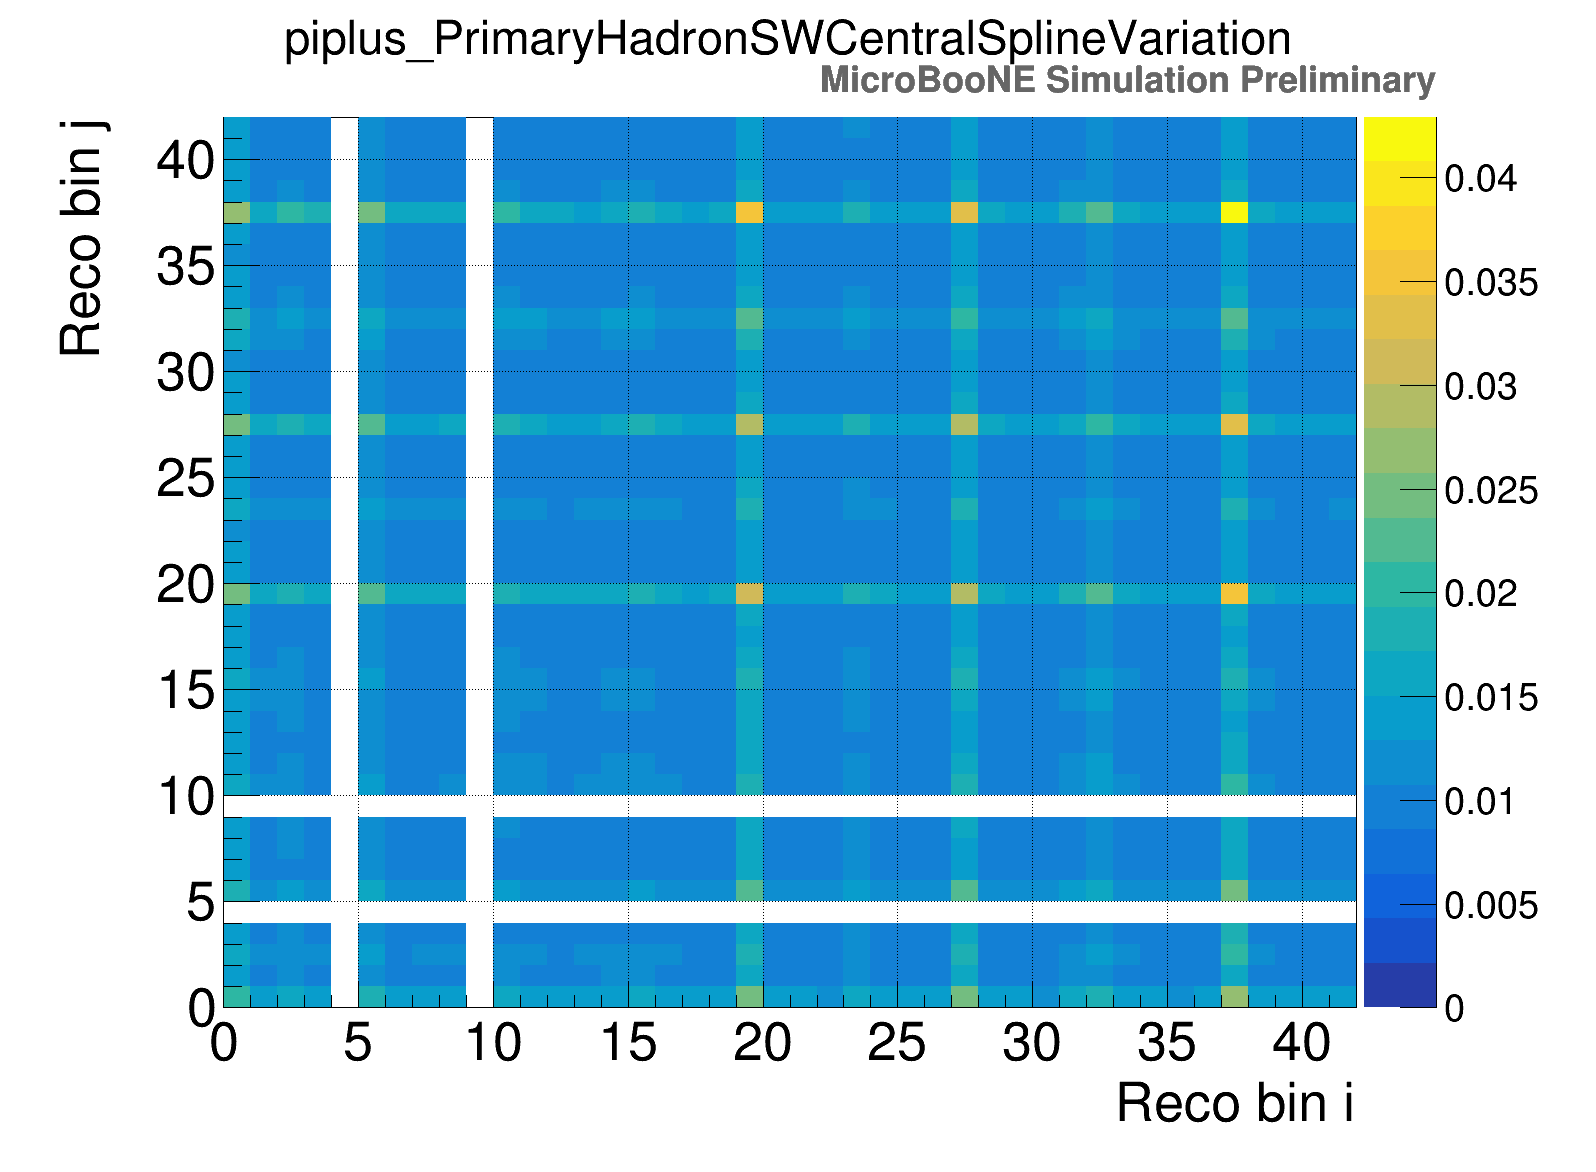

In [32]:
ROOT.gStyle.SetOptTitle(1)

for para in range(num_para):
    ROOT.gStyle.SetPaintTextFormat('0.6g')
    h_covariance = ROOT.TH2D("h_covariance",weight_list[para],sum_bins,0,sum_bins,sum_bins,0,sum_bins)
    for i in range(sum_bins):
        for j in range(sum_bins):
            h_covariance.SetBinContent(i+1,j+1,xsec_frac_matrix_flux[para][i,j])
    #h_covariance.SetXTitle("Reco bin i, 7=overflow")
    #h_covariance.SetYTitle("True bin j")
    h_covariance.SetXTitle("Reco bin i")
    h_covariance.SetYTitle("Reco bin j")

    h_covariance.GetYaxis().SetTitleSize(0.05)
    h_covariance.GetYaxis().SetTitleOffset(0.0)
    h_covariance.GetYaxis().SetLabelSize(0.05)
    h_covariance.GetXaxis().SetTitleSize(0.05)
    h_covariance.GetXaxis().SetLabelSize(0.05)
    h_covariance.GetXaxis().SetTitleOffset(1)
    h_covariance.SetLineColor(ROOT.kBlack)
    h_covariance.SetLineWidth(4)
    ROOT.gStyle.SetEndErrorSize(5)
    c1.SetRightMargin(0.15)
    ROOT.gStyle.SetPaintTextFormat('0.4g')

    h_covariance.Draw('colz')
    #_covariance.Draw('same text')
    prelim = draw_sim()
    prelim.Draw()
    c1.Draw()
    c1.SaveAs(outputdir_png + 'h_frac_fluxsys'+weight_list[para]+'.png')
    c1.SaveAs(outputdir_root + 'h_frac_fluxsys'+weight_list[para]+'.root')
    c1.SaveAs(outputdir_pdf + 'h_frac_fluxsys'+weight_list[para]+'.pdf')
    #h_covariance.Write('h_covariance')

Warning in <TROOT::Append>: Replacing existing TH1: h_covariance (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_frac_fluxsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/root/h_frac_fluxsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_frac_fluxsys.pdf has been created


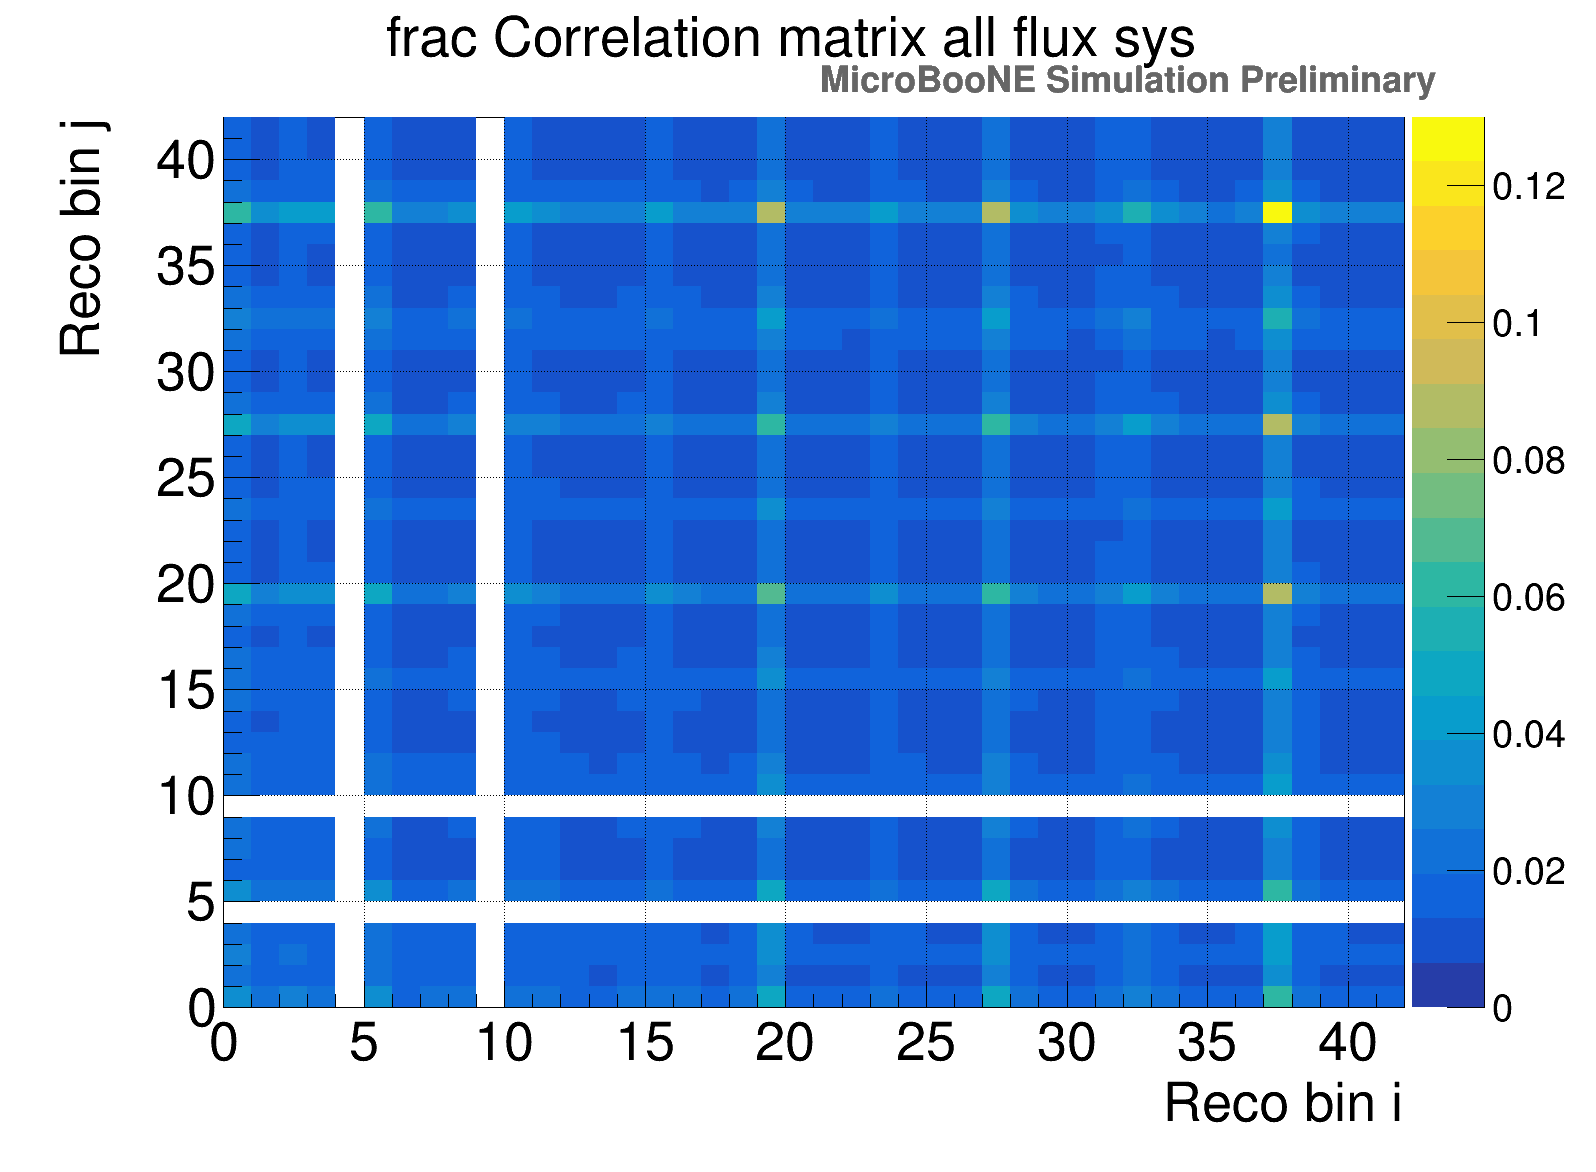

In [33]:
ROOT.gStyle.SetPaintTextFormat('0.6g')
h_covariance = ROOT.TH2D("h_covariance",'frac Correlation matrix all flux sys',sum_bins,0,sum_bins,sum_bins,0,sum_bins)
for i in range(sum_bins):
    for j in range(sum_bins):
        h_covariance.SetBinContent(i+1,j+1,xsec_frac_matrix[i,j])
#h_covariance.SetXTitle("Reco bin i, 7=overflow")
#h_covariance.SetYTitle("True bin j")
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")

h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')

h_covariance.Draw('colz')
#h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_fluxsys.png")
c1.SaveAs(outputdir_root + "h_frac_fluxsys.root")
c1.SaveAs(outputdir_pdf + "h_frac_fluxsys.pdf")
#h_covariance.Write('h_covariance')
RootFile = ROOT.TFile(output_filedir+"Flux_systematic_2D.root","update");
h_covariance.Write('h_frac_covariance')
RootFile.Close()  

In [34]:
# draw all xsec
c1.SetRightMargin(0.15)
ROOT.gStyle.SetOptTitle(1)

bin_counter = 0

for t_bin in range(len_theta): #len_theta
    h_xsec_data_cv[t_bin].SetMaximum(-1111)
    ybin = 200
    ystart = 0.0
    yend = h_xsec_data_cv[t_bin].GetMaximum()*1.5
    y = np.arange(ystart, yend+(yend-ystart)/(ybin-1), (yend-ystart)/(ybin-1) ).tolist()
    h_col2 = ROOT.TH2D('h_col2','h_col2',len_mom[t_bin],array('f',mom_bins[t_bin]),ybin-1,array('f',y))
    h_col2.SetTitle(str(theta_bins[t_bin])+'< cos(#theta^{reco}_{#mu}) <'+str(theta_bins[t_bin+1]))
    h_col2.SetYTitle("#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]")
    h_col2.SetXTitle("p^{reco}_{#mu} [GeV]")
    h_col2.GetYaxis().SetTitleSize(0.05)
    h_col2.GetYaxis().SetTitleOffset(0.0)
    h_col2.GetYaxis().SetLabelSize(0.05)
    h_col2.GetXaxis().SetTitleSize(0.05)
    h_col2.GetXaxis().SetLabelSize(0.05)
    h_col2.GetXaxis().SetTitleOffset(1)

    legend = ROOT.TLegend(0.55,0.35,0.9,0.9); #LEGEND RIGHT
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()
    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)

    h_xsec_this = h_xsec_data_cv[t_bin].Clone()
    legend.AddEntry(h_xsec_this,'CV, sys. err. flux',"f")
    #legend.AddEntry(h_col2,'Genie All',"f")
    for para in range(num_para):
        for uni in range(num_universes):
            for i in range(1,len_mom[t_bin]+1):
                h_col2.Fill(h_xsec_data[para][uni][t_bin].GetXaxis().GetBinCenter(i),h_xsec_data[para][uni][t_bin].GetBinContent(i))
    h_col2.GetYaxis().SetLabelSize(0.05);
    h_col2.GetYaxis().SetTitleSize(0.05);
    h_col2.GetYaxis().SetTitleOffset(0.8);
    h_col2.GetXaxis().SetLabelOffset(999);
    h_col2.GetXaxis().SetTitleOffset(999);
    h_col2.GetXaxis().SetLabelSize(0);
    h_col2.GetXaxis().SetTitleSize(0);
    h_col2.Draw('colz')
    for m_bin in range(len_mom[t_bin]):
        h_xsec_this.SetBinError(m_bin+1,math.sqrt(cov_matrix[bin_counter][bin_counter]))
        bin_counter+=1
    h_xsec_this.Draw('E1 same')
    legend.Draw()
    
    c1.cd()
    h_xsec_this.GetXaxis().SetLabelOffset(0);
    h_xsec_this.GetXaxis().SetTitleOffset(0);
    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_xsec_this_2 = h_xsec_this.Clone()
    h_xsec_this_2.Divide(h_xsec_this)
    h_xsec_this_2.SetTitle(' ')
    h_xsec_this_2.SetYTitle('Data/(Ext+MC)')
    h_xsec_this_2.GetYaxis().SetTitleSize(0.1)
    h_xsec_this_2.GetYaxis().SetTitleOffset(0.3)
    h_xsec_this_2.GetYaxis().SetLabelSize(0.07)

    h_xsec_this_2.GetXaxis().SetTitleSize(0.15)
    h_xsec_this_2.GetXaxis().SetLabelSize(0.15)
    h_xsec_this_2.GetXaxis().SetTitleOffset(1)
    h_xsec_this_2.SetMinimum(-1111)
    h_xsec_this_2.SetMaximum(-1111)
    h_xsec_this_2.Draw('e1')

    c1.SaveAs(outputdir_png + 'h_xsec_2D_'+str(t_bin)+'_all_sys.png')
    #c1.SaveAs(globale.outputdir_root + 'h_xsec_2D_'+str(t_bin)+'_all_sys.root')
    c1.SaveAs(outputdir_pdf + 'h_xsec_2D_'+str(t_bin)+'_all_sys.pdf')

    c1.Draw()
            
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.05)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_0_all_sys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_0_all_sys.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_col2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/png/h_xsec_2D_1_all_sys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_flux_2D_2_mar18/pdf/h_xsec_2D_1_all_sys.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: h_col2 (Potential memory leak).
Warning in <TCanvas:

In [35]:
# close the root file with all the histos
RootFile.Close()